In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The purpose of notebook is classifier by result of bank marketing campaigns.

In [2]:
data = pd.read_csv("bank-additional-full.csv", delimiter=";")

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Data was downloaded from https://archive.ics.uci.edu/ml/datasets/bank+marketing

# Data description
## bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.', 'blue collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

## related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In dataset is no missing values. 11 variables is categorical.

# Exploration Data Analyst

In [6]:
def categorical_variable(variable_1,variable_2):
    
    list_of_columns = sorted(set(data[variable_1]))
    #plot_1 -  numbers of observations
    plt.figure(figsize=(15,5))
    plot = sns.countplot(x=variable_1,data = data,order=list_of_columns)

    for p in plot.patches:
        height = p.get_height()
        plot.text(p.get_x()+p.get_width()/2., height + 0.1,p.get_height(), ha="center")
    plt.show()

    #plot_2-  numbers of observations by result
    plt.figure(figsize=(15,5))
    plot = sns.countplot(x=variable_1,hue=variable_2,data = data,order=list_of_columns)

    for p in plot.patches:
        plot.text(p.get_x()+p.get_width()/2., p.get_height() + 0.1,p.get_height(),ha="center") 
    plt.show()
    
    #summary
    df = data.groupby(variable_1)[variable_2].value_counts(normalize=True)
    df = df.rename('percent').reset_index()
    df = df.pivot_table('percent', [variable_2],variable_1)
    display(df)


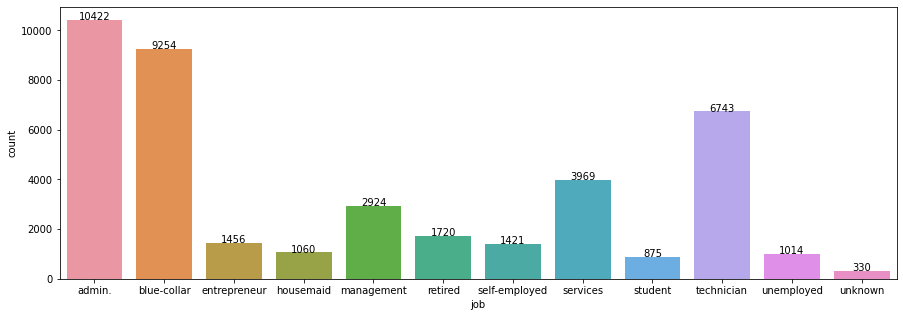

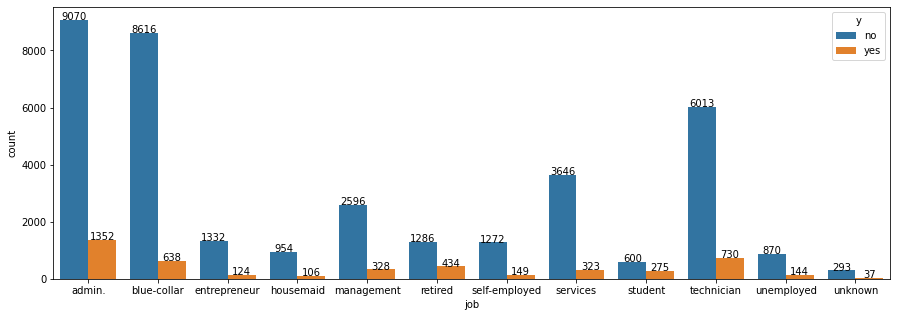

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,0.870274,0.931057,0.914835,0.9,0.887825,0.747674,0.895144,0.918619,0.685714,0.89174,0.857988,0.887879
yes,0.129726,0.068943,0.085165,0.1,0.112175,0.252326,0.104856,0.081381,0.314286,0.10826,0.142012,0.112121


In [7]:
categorical_variable('job','y')

The biggest group in dataset are people from administration. People who retired most often agreed with subscribed a term deposit. 

## Marital

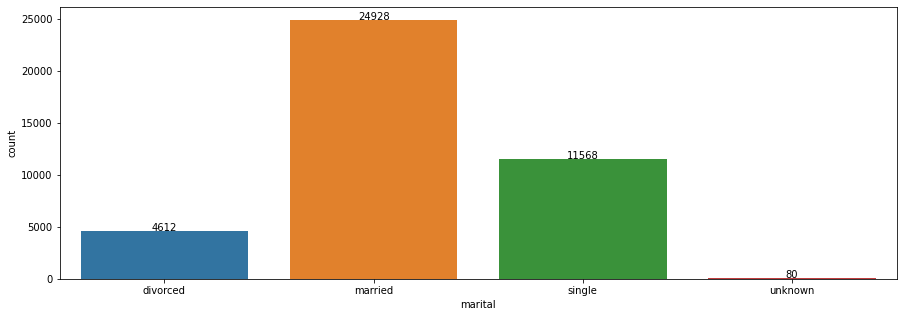

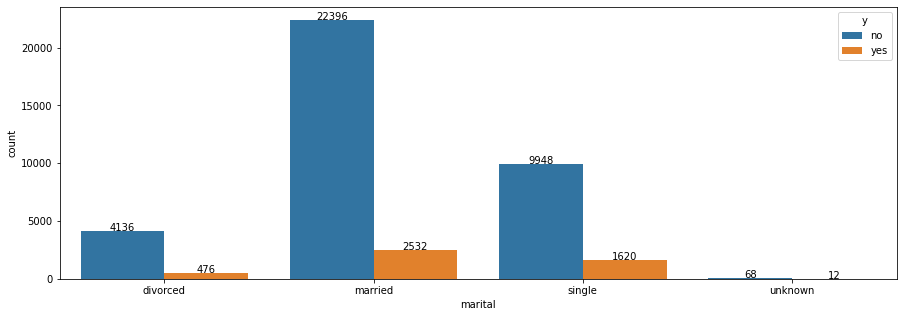

marital,divorced,married,single,unknown
y,,,,
no,0.896791,0.898427,0.859959,0.85
yes,0.103209,0.101573,0.140041,0.15


In [8]:
categorical_variable('marital','y')

Single more often than married or divorced people agreed subscibers a term deposit.

## Education

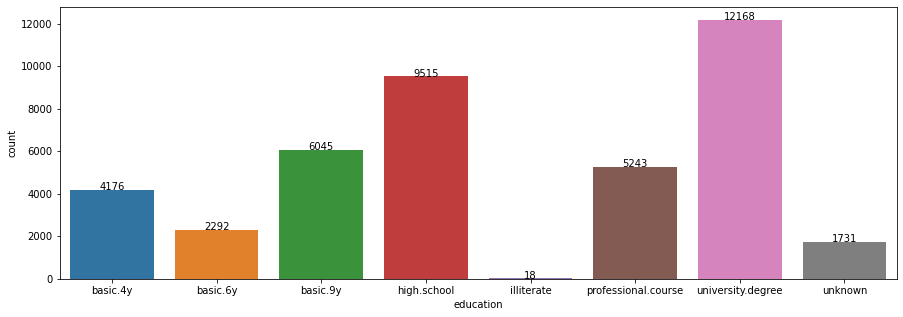

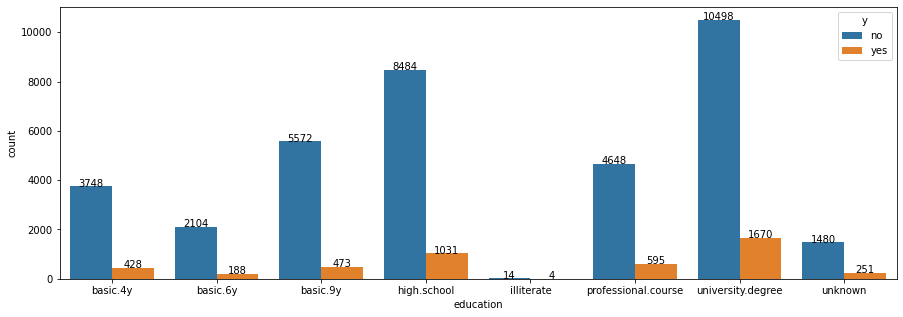

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,0.89751,0.917976,0.921754,0.891645,0.777778,0.886515,0.862755,0.854997
yes,0.10249,0.082024,0.078246,0.108355,0.222222,0.113485,0.137245,0.145003


In [9]:
categorical_variable('education','y')

22% of illiterate agreed on term deposit, but they are the smallest group in dataset - only 18 people declared as illiterate. People with university degree are the biggest group in dataset and 13,7% of them agreed on term deposit.

## Default

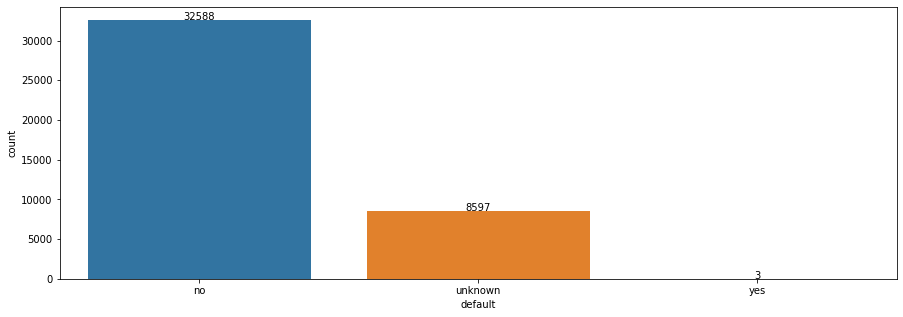

posx and posy should be finite values
posx and posy should be finite values


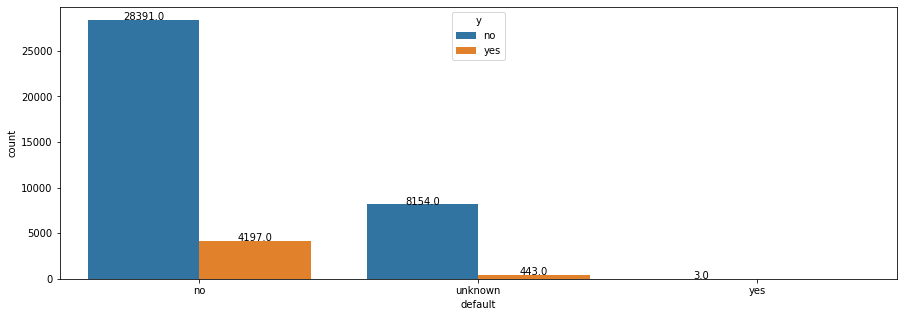

default,no,unknown,yes
y,,,
no,0.87121,0.94847,1.0
yes,0.12879,0.05153,NaN


In [10]:
categorical_variable('default','y')

Only 3 of clients are in default and 20,8% of clients have unknow default situation. This variable will be deleted from model dataset.

## Housing

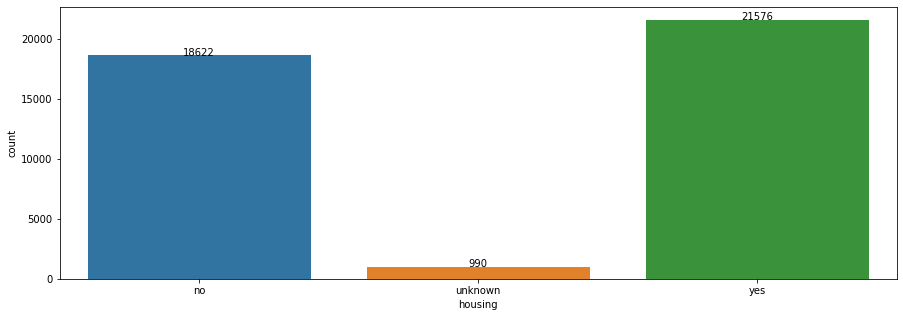

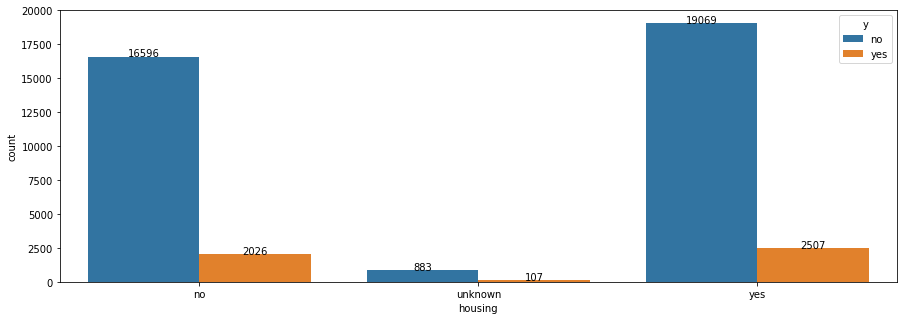

housing,no,unknown,yes
y,,,
no,0.891204,0.891919,0.883806
yes,0.108796,0.108081,0.116194


In [11]:
categorical_variable('housing','y')

52% clients has housing loan.

## Loan

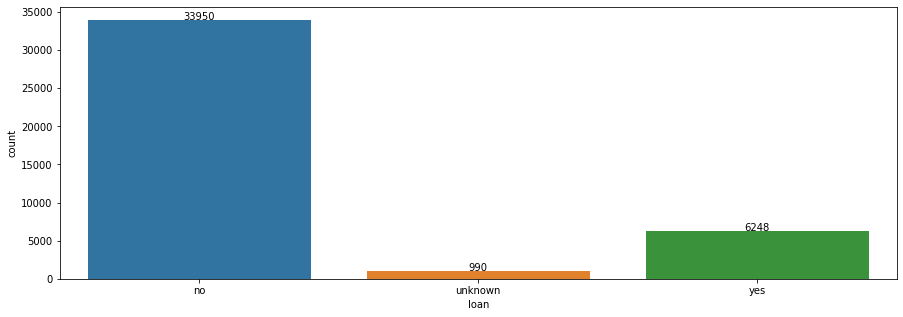

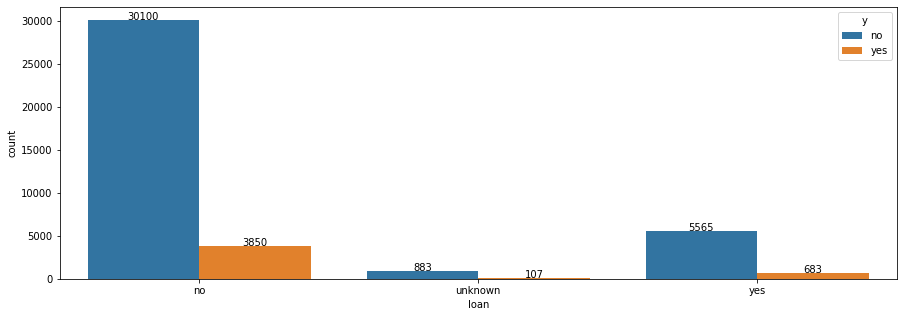

loan,no,unknown,yes
y,,,
no,0.886598,0.891919,0.890685
yes,0.113402,0.108081,0.109315


In [12]:
categorical_variable('loan','y')

15% of clients has personal loan.

## Contact

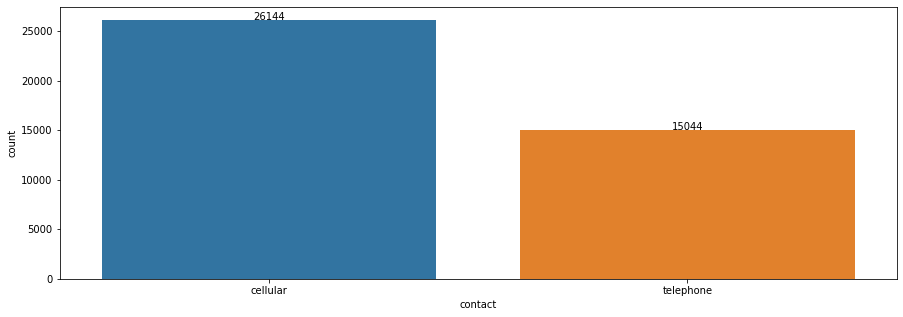

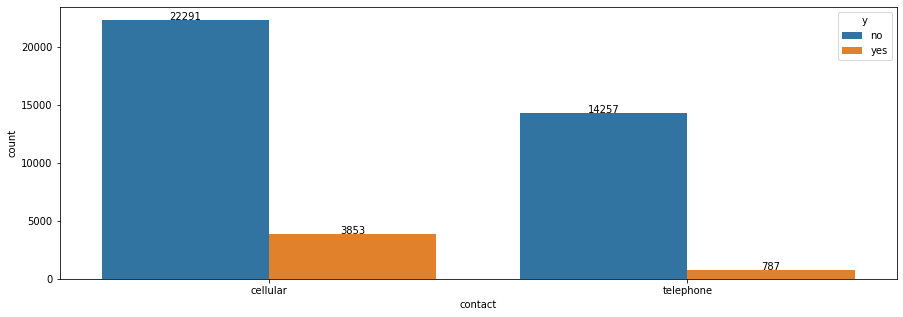

contact,cellular,telephone
y,,
no,0.852624,0.947687
yes,0.147376,0.052313


In [13]:
categorical_variable('contact','y')

Clients with cellular contact are bigger group than clients with telephone contact and they more often subscribed term deposit.

## Month

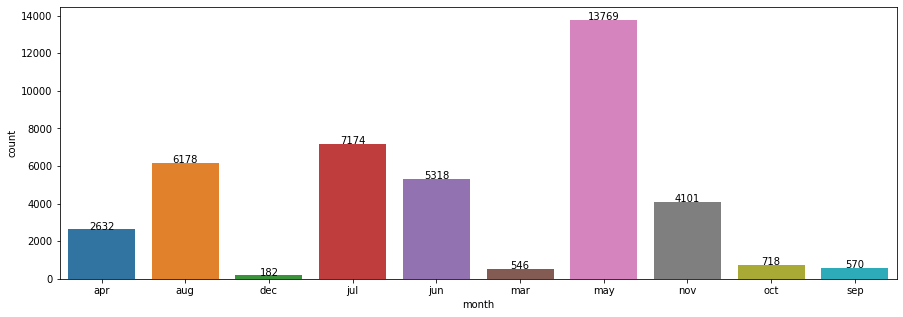

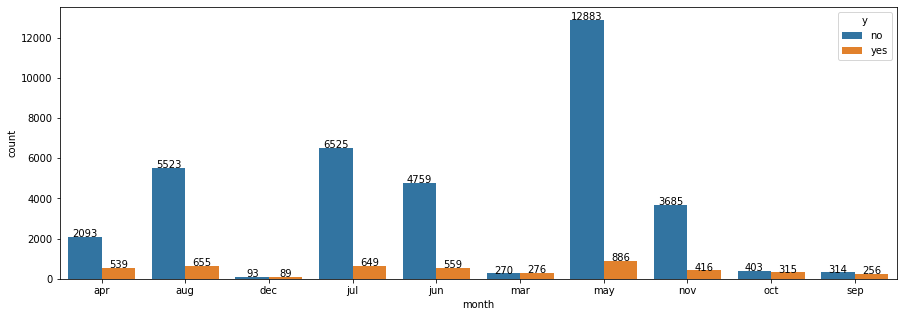

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
no,0.795213,0.893979,0.510989,0.909534,0.894885,0.494505,0.935653,0.898561,0.561281,0.550877
yes,0.204787,0.106021,0.489011,0.090466,0.105115,0.505495,0.064347,0.101439,0.438719,0.449123


In [14]:
categorical_variable('month','y')

33% of clients has last contact in May.

## Day of week

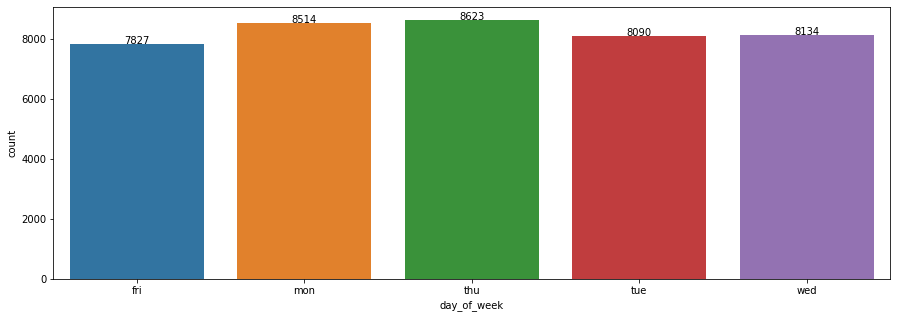

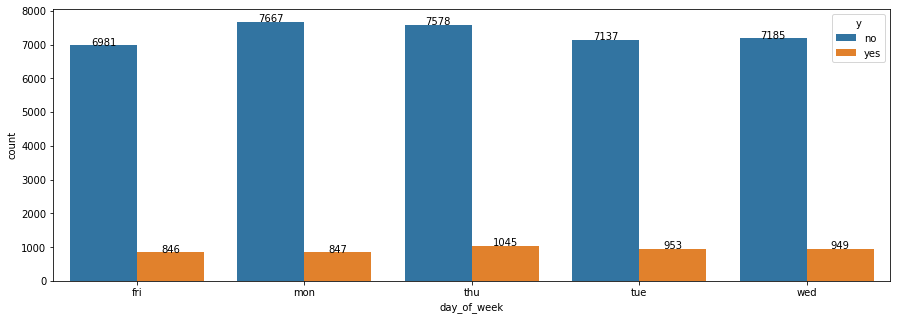

day_of_week,fri,mon,thu,tue,wed
y,,,,,
no,0.891913,0.900517,0.878812,0.8822,0.883329
yes,0.108087,0.099483,0.121188,0.1178,0.116671


In [15]:
categorical_variable('day_of_week','y')

From Monday to Fridey number of samples and effectiveness is similar.

## Poutcome

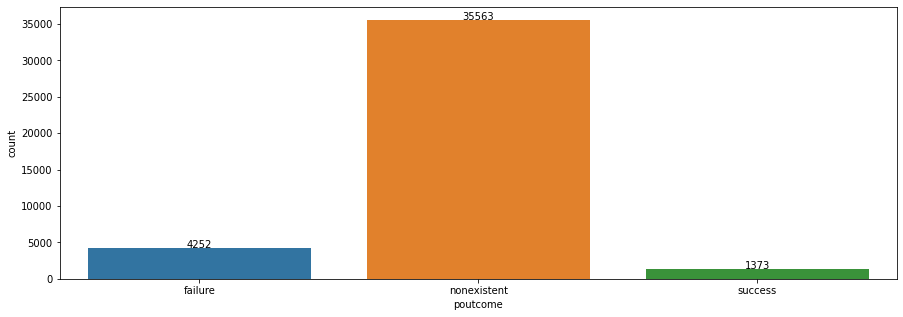

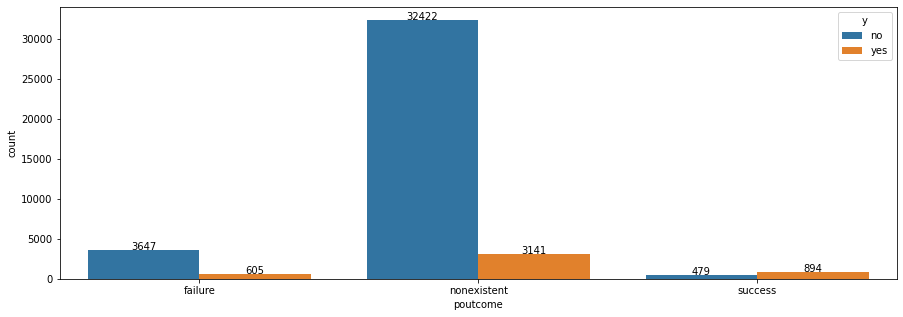

poutcome,failure,nonexistent,success
y,,,
no,0.857714,0.911678,0.348871
yes,0.142286,0.088322,0.651129


In [16]:
categorical_variable('poutcome','y')

86% of contacts was to clients without history of marketing campaign

# Numeric varibale

In [17]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [18]:
def numeric_variable(variable_1,variable_2):

    #plot_1 - histogram
    data[variable_1].hist(bins=20)
    plt.show()

    #plot_2 - histogram by result
    data[variable_1].hist(by=data[variable_2])
    plt.show()
    
    #plot 3 - boxplot
    sns.boxplot(x=variable_2, y=variable_1, data=data)

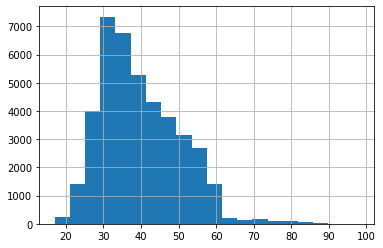

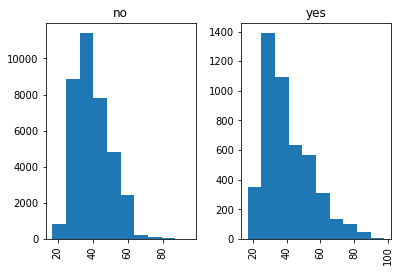

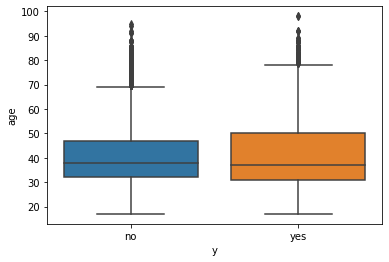

In [19]:
numeric_variable('age','y')

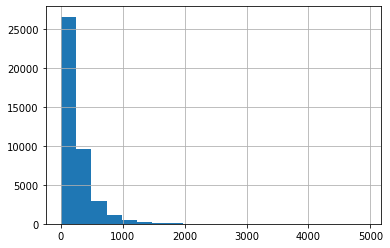

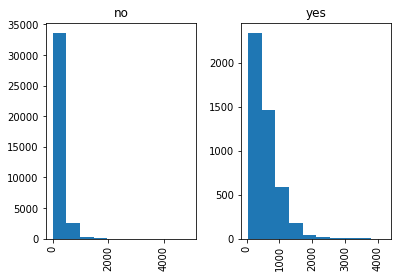

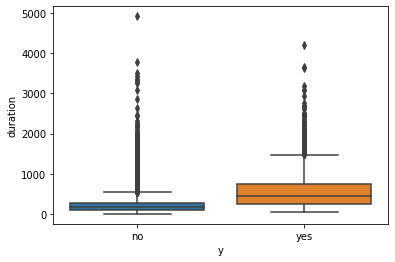

In [20]:
numeric_variable('duration','y')

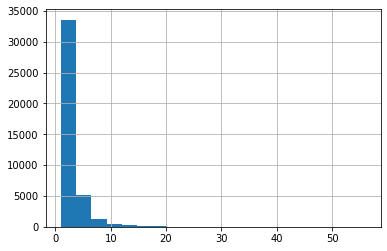

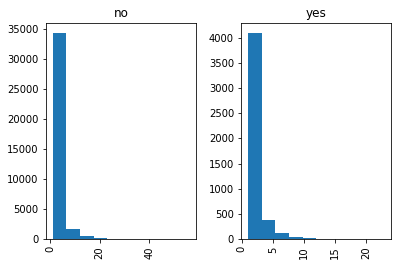

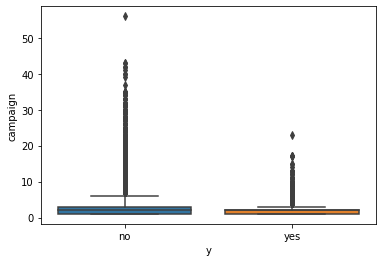

In [21]:
numeric_variable('campaign','y')

Because of outliers I create new, categorical variable(campaign_new): '1', '2', '3', '4 and more' campaign.

In [22]:
data['campaign_new'] = np.where(data['campaign']<4, data['campaign'], '4 and more')

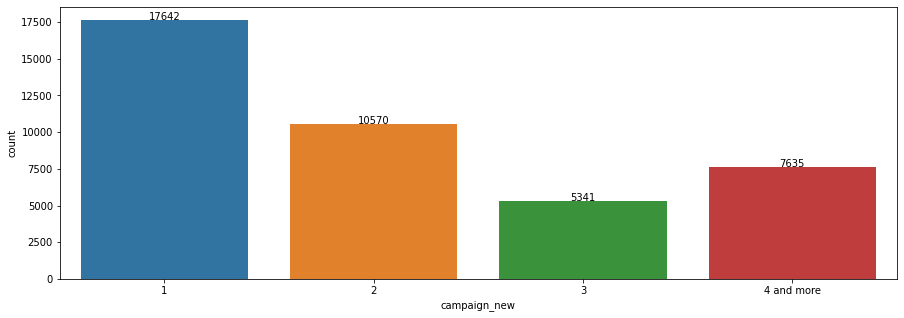

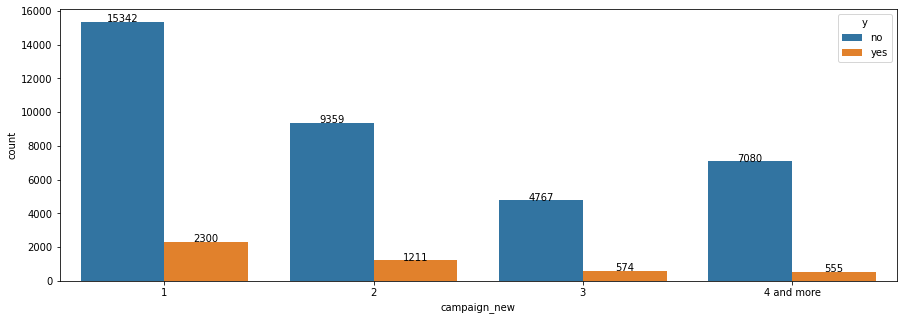

campaign_new,1,2,3,4 and more
y,,,,
no,0.869629,0.88543,0.892529,0.927308
yes,0.130371,0.11457,0.107471,0.072692


In [23]:
categorical_variable('campaign_new','y')

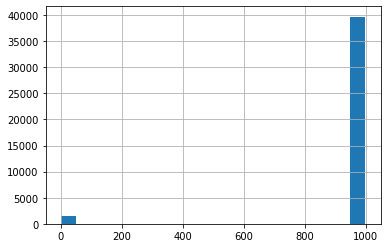

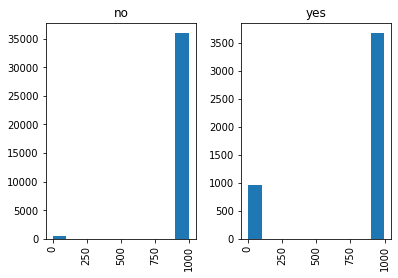

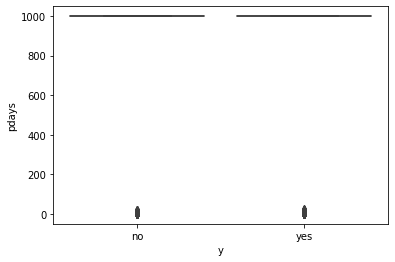

In [24]:
numeric_variable('pdays','y')

In varaible 'pdays' 999 means client was not previously contacted. We have a lot of '999' observation, so I can try change that into new, vategorical variable. 'No' if client was not previously contacted, and 'yes' if he was.

In [25]:
data['pdays_new'] = np.where(data['pdays']==999, 'no', 'yes')

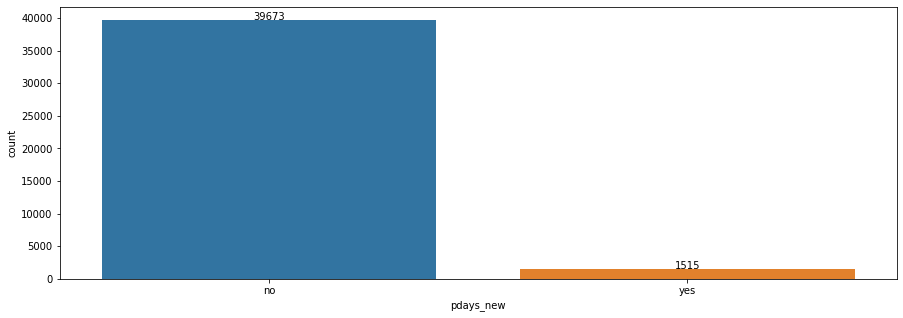

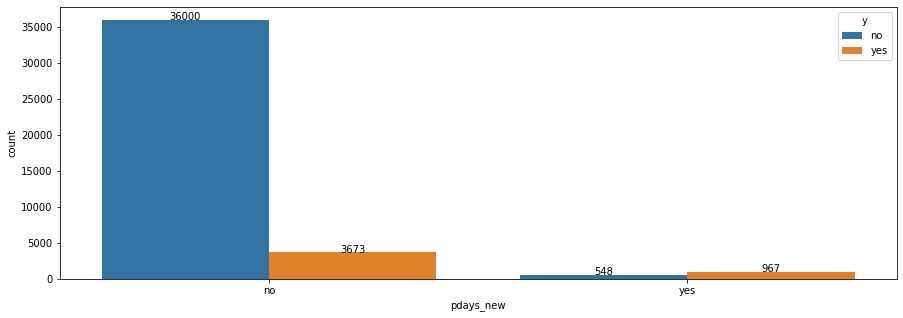

pdays_new,no,yes
y,,
no,0.907418,0.361716
yes,0.092582,0.638284


In [26]:
categorical_variable('pdays_new','y')

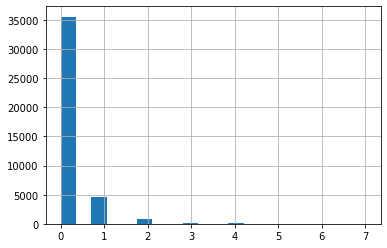

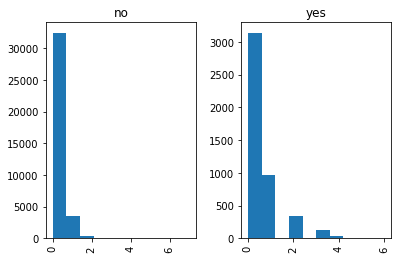

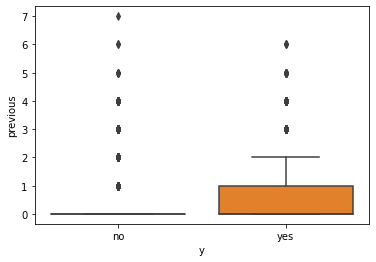

In [27]:
numeric_variable('previous','y')

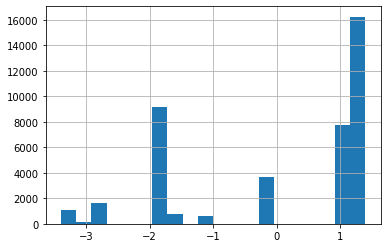

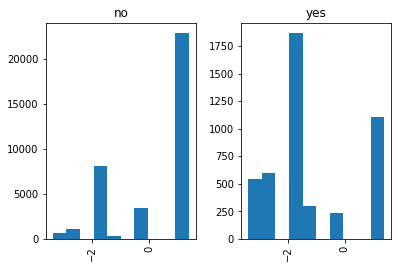

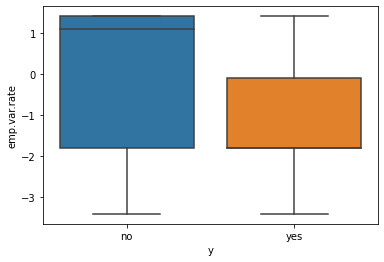

In [28]:
numeric_variable('emp.var.rate','y')

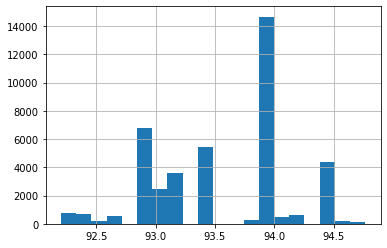

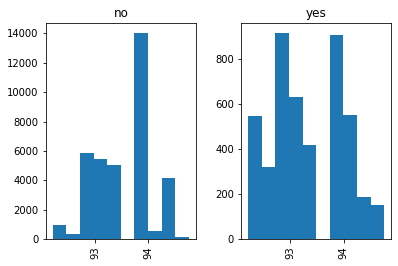

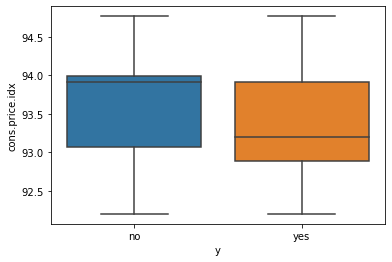

In [29]:
numeric_variable('cons.price.idx','y')

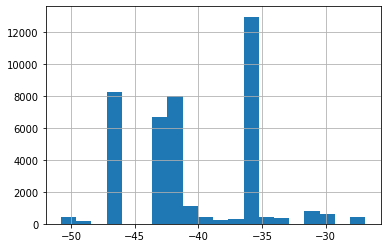

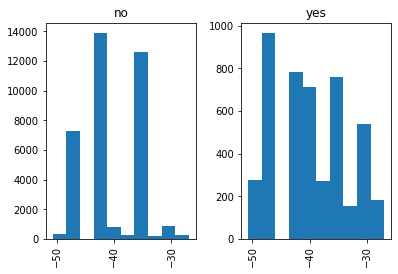

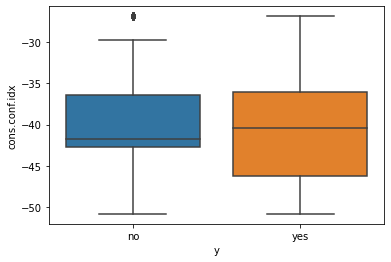

In [30]:
numeric_variable('cons.conf.idx','y')

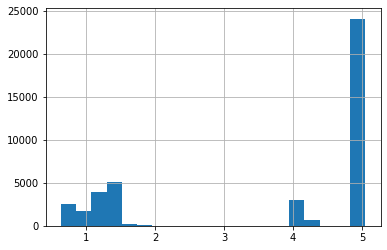

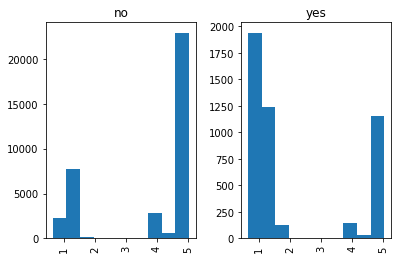

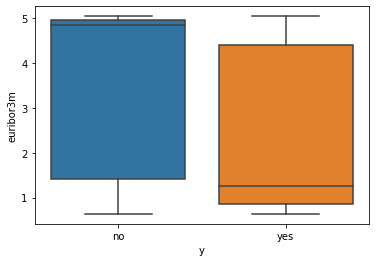

In [31]:
numeric_variable('euribor3m','y')

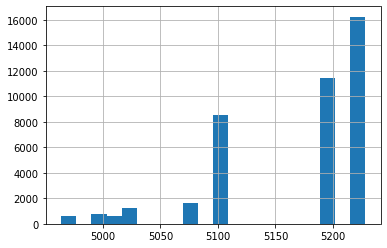

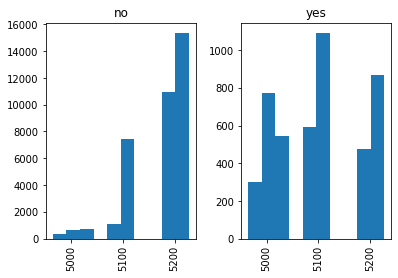

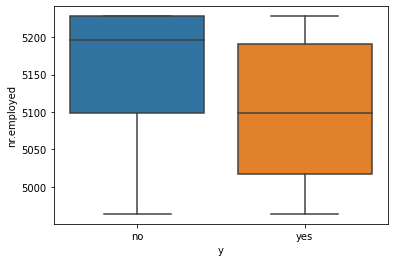

In [32]:
numeric_variable('nr.employed','y')

# Preprocessing

In [33]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["job_code"] = lb_make.fit_transform(data["job"])
data["marital_code"] = lb_make.fit_transform(data["marital"])
data["housing_code"] = lb_make.fit_transform(data["housing"])
data["education_code"] = lb_make.fit_transform(data["education"])
data["contact_code"] = lb_make.fit_transform(data["contact"])
data["month_code"] = lb_make.fit_transform(data["month"])
data["day_of_week_code"] = lb_make.fit_transform(data["day_of_week"])
data["poutcome_code"] = lb_make.fit_transform(data["poutcome"])
data['pdays_new_code'] =lb_make.fit_transform(data["pdays_new"])
data['campaign_new_code']=lb_make.fit_transform(data["campaign_new"]) 
data.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_code,marital_code,housing_code,education_code,contact_code,month_code,day_of_week_code,poutcome_code,pdays_new_code,campaign_new_code
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,3,1,0,0,1,6,1,1,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,7,1,0,3,1,6,1,1,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,7,1,2,3,1,6,1,1,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,1,0,1,1,6,1,1,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,7,1,0,3,1,6,1,1,0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,7,1,0,2,1,6,1,1,0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,0,1,0,5,1,6,1,1,0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,1,0,7,1,6,1,1,0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,9,2,2,5,1,6,1,1,0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,7,2,2,3,1,6,1,1,0,0


In [34]:
data.replace({'y': {"yes": 1,'no':0}},inplace=True)

## Correlations

In [35]:
data_2 = data[["job_code","marital_code","education_code","contact_code","housing_code",
               "month_code","day_of_week_code",'duration', 'campaign_new_code', 'pdays_new_code', 
               'previous', 'age','emp.var.rate','cons.price.idx','cons.conf.idx' ,'euribor3m','nr.employed','y']]

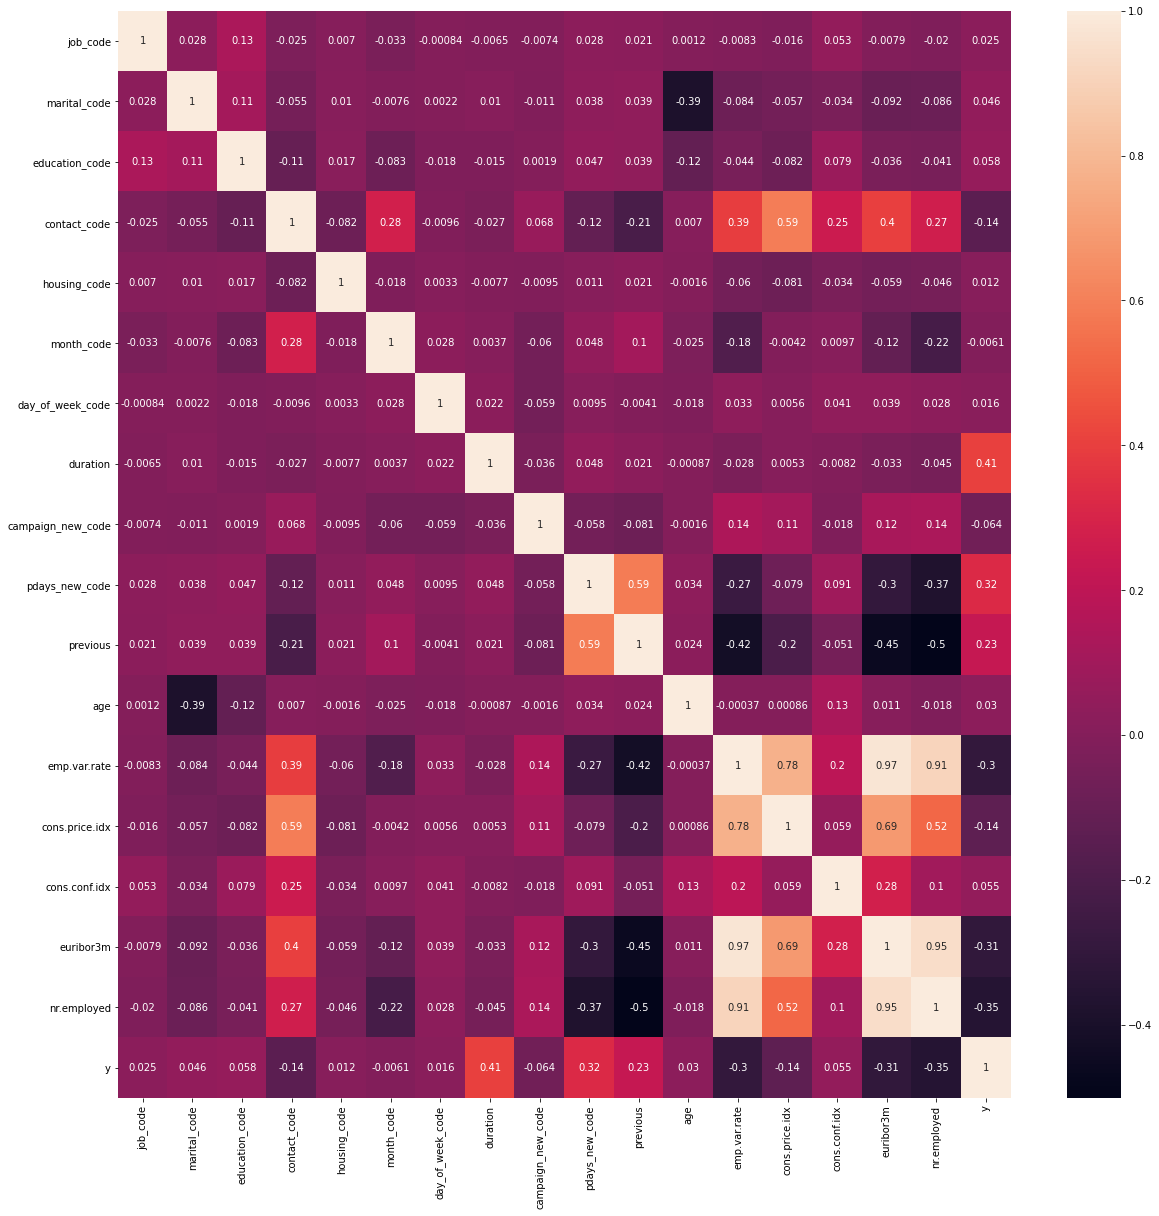

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(data_2.corr(), annot=True )

In [37]:
X =  data_2[["job_code","marital_code","education_code","contact_code","housing_code",
               "month_code","day_of_week_code",'duration', 'campaign_new_code', 'pdays_new_code', 
               'previous', 'age','emp.var.rate','cons.price.idx','cons.conf.idx' ,'euribor3m','nr.employed']]
y = data_2[["y"]]

## Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [40]:
y_true=y_test

In [41]:
def plot_roc_curve(y_true, scores):
    fpr, tpr, thresholds = roc_curve(y_true=y_true,
                                     y_score=scores)

    plt.plot(fpr, tpr)
    plt.scatter(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], linestyle='--')
    auc = roc_auc_score(y_true=y_true,
                        y_score=scores)
    plt.title('AUC: {}'.format(auc))
    plt.show()

In [42]:
models = [make_pipeline(StandardScaler(),LogisticRegression()),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

for model in models:

    model.fit(X_train, y_train.values.ravel())
    probs = model.predict_proba(X_test)[:,1]
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(model)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_true=y_test, y_score=probs))
    

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Accuracy: 90.86% AUC:  0.9270498585347784
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Accuracy: 90.16% AUC:  0.8705827953701895
DecisionTreeClassifier(ccp_alpha=0.0, class_wei

We have winner - Random Forrest Classifier, this model has the best accuracy.

In [47]:
model = RandomForestClassifier()
model.fit(X_train, y_train.values.ravel())
probs = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)
print(classification_report(y_true, y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     12070
           1       0.65      0.51      0.57      1523

    accuracy                           0.91     13593
   macro avg       0.79      0.74      0.76     13593
weighted avg       0.91      0.91      0.91     13593

Confusion Matrix : 
 [[11652   418]
 [  747   776]]


Predict for negative result of contact with clients is very good. Because of that bank can reject some clients from calllist. The cost will be lower and agent will have more time for convince unconvinced clients. 